# Customer Purchase Behavior Analysis in a Supermarket and Identification of Opportunities to Increase Sales

The supermarket aims to better understand customer behavior and the factors influencing sales to increase profits and improve the shopping experience. The project’s goal is to identify key trends in customer behavior, segment customers for better personalization of offers, and determine the most profitable products and marketing strategies. The results of the analysis will help optimize sales and loyalty strategies, improve customer service, and better manage the product assortment.

1.What are the sales trends depending on the location?

Which supermarket branches (in different cities or locations) generate the highest revenue?

Are there noticeable differences in product category popularity based on location?


2.How do customer behaviors differ between members ("Member") and regular customers ("Normal")?

Do members spend more on single purchases than regular customers?

Are there differences in preferred payment methods between these groups?


3.How does the gender of customers influence their purchasing preferences?

Which product categories are more popular among women, and which among men?

How does the average basket value differ between genders?


4.What are the peak sales hours?

During which hours of the day is sales volume the highest?

Do certain hours have a bigger impact on sales in specific product categories?


5.Which product categories generate the highest margins?

Which products have the highest profit margins (gross income) relative to costs?

How does sales in different categories affect overall profitability?


6.Which payment methods are most commonly used by customers?

Do payment preferences differ based on location, gender, or customer type?

How do payment methods influence the transaction value?


7.What factors influence customer ratings?

Is there a relationship between purchase value or chosen products and the ratings given by customers?

How do location and payment methods impact customer satisfaction?


8.How can sales be increased through offer personalization?

Do specific customer segments (e.g., members, female customers) respond better to promotions or certain products?

What marketing actions could attract more customers to less popular product categories?

# Setup

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("SuperMarket Analysis.csv")

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


# Preparing data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
print(data.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Sales                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


# Main part of the project 

# Task 1 

In [11]:
revenue_by_branch = data.groupby(['City', 'Branch'])['Sales'].sum().reset_index()
revenue_by_branch = revenue_by_branch.sort_values(by='Sales', ascending=False)

print("Revenue by Branch:")
print(revenue_by_branch)

Revenue by Branch:
        City Branch        Sales
1  Naypyitaw   Giza  110568.7065
2     Yangon   Alex  106200.3705
0   Mandalay  Cairo  106197.6720


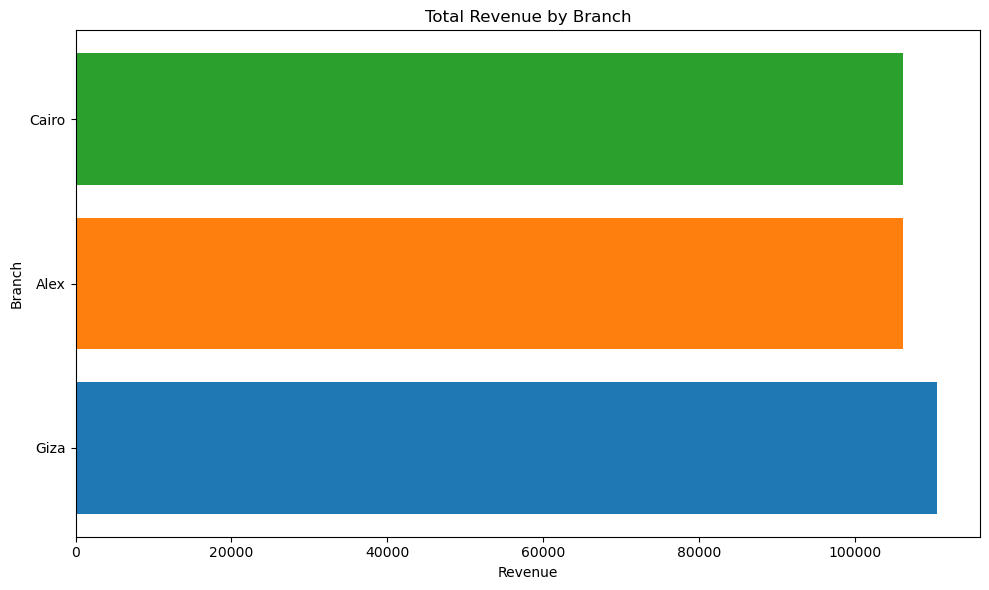

In [38]:
plt.figure(figsize=(10, 6))
plt.barh(revenue_by_branch['Branch'], revenue_by_branch['Sales'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Total Revenue by Branch')
plt.xlabel('Revenue')
plt.ylabel('Branch')
plt.tight_layout()
plt.show()

In [10]:
category_popularity_by_location = data.groupby(['City', 'Product line'])['Sales'].sum().reset_index()
category_popularity_by_location = category_popularity_by_location.sort_values(by=['City', 'Sales'], ascending=False)

print("\nCategory Popularity by Location:")
print(category_popularity_by_location)


Category Popularity by Location:
         City            Product line       Sales
16     Yangon      Home and lifestyle  22417.1955
17     Yangon       Sports and travel  19372.6995
12     Yangon  Electronic accessories  18317.1135
14     Yangon      Food and beverages  17163.1005
13     Yangon     Fashion accessories  16332.5085
15     Yangon       Health and beauty  12597.7530
8   Naypyitaw      Food and beverages  23766.8550
7   Naypyitaw     Fashion accessories  21560.0700
6   Naypyitaw  Electronic accessories  18968.9745
9   Naypyitaw       Health and beauty  16615.3260
11  Naypyitaw       Sports and travel  15761.9280
10  Naypyitaw      Home and lifestyle  13895.5530
5    Mandalay       Sports and travel  19988.1990
3    Mandalay       Health and beauty  19980.6600
4    Mandalay      Home and lifestyle  17549.1645
0    Mandalay  Electronic accessories  17051.4435
1    Mandalay     Fashion accessories  16413.3165
2    Mandalay      Food and beverages  15214.8885


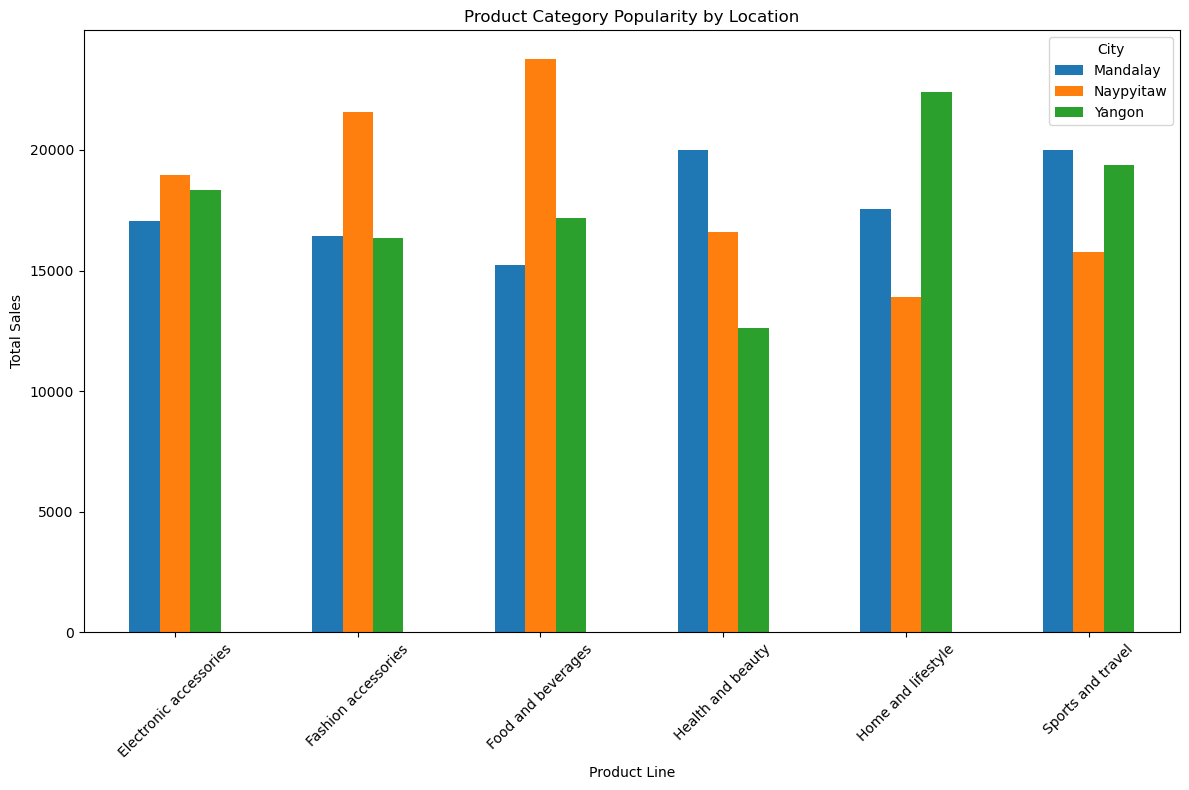

In [23]:
pivot_data = category_popularity_by_location.pivot(index='Product line', columns='City', values='Sales')

pivot_data.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Product Category Popularity by Location')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()

# Task 2 


In [17]:
avg_spend_per_customer_type = data.groupby('Customer type')['Sales'].mean().reset_index()
print("Average Spend per Customer Type:")
print(avg_spend_per_customer_type)

Average Spend per Customer Type:
  Customer type       Sales
0        Member  335.742945
1        Normal  306.372379


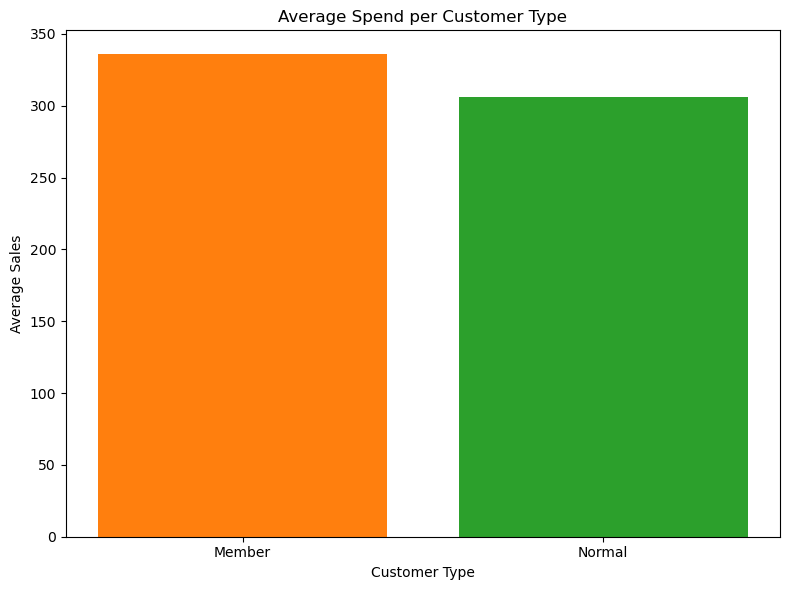

In [25]:
plt.figure(figsize=(8, 6))
plt.bar(avg_spend_per_customer_type['Customer type'], avg_spend_per_customer_type['Sales'], color=['#ff7f0e', '#2ca02c'])
plt.title('Average Spend per Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

In [18]:
payment_preferences = data.groupby(['Customer type', 'Payment']).size().reset_index(name='Count')

print("\nPayment Preferences by Customer Type:")
print(payment_preferences)



Payment Preferences by Customer Type:
  Customer type      Payment  Count
0        Member         Cash    192
1        Member  Credit card    187
2        Member      Ewallet    186
3        Normal         Cash    152
4        Normal  Credit card    124
5        Normal      Ewallet    159


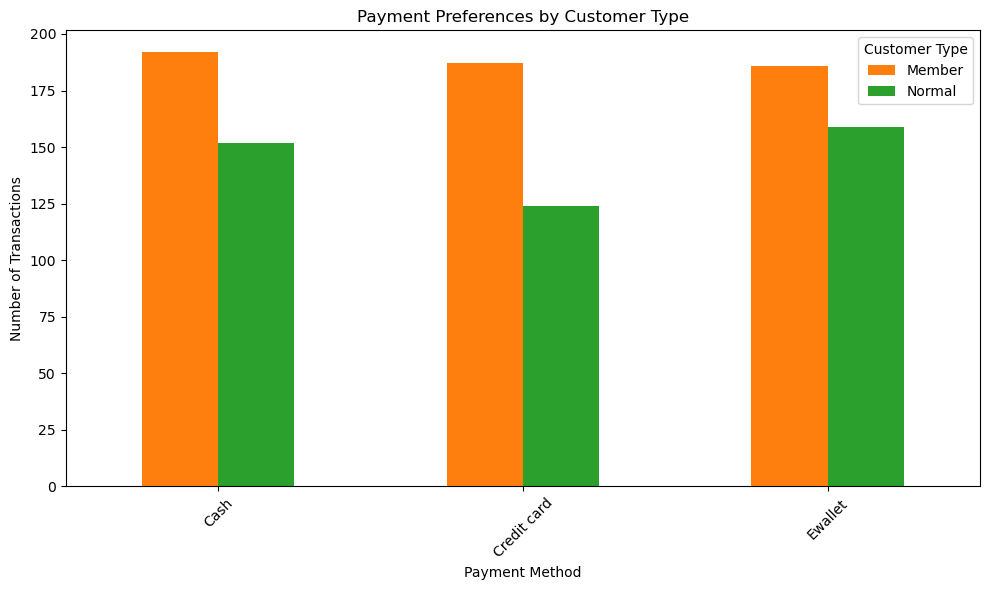

In [26]:
pivot_data = payment_preferences.pivot(index='Payment', columns='Customer type', values='Count')

pivot_data.plot(kind='bar', figsize=(10, 6), color=['#ff7f0e', '#2ca02c'])
plt.title('Payment Preferences by Customer Type')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


# Task 3 

In [34]:
category_popularity_by_gender = data.groupby(['Gender', 'Product line'])['Sales'].sum().unstack()
print(category_popularity_by_gender)

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Gender                                                                          
Female                    31226.7060            33919.641          36465.7965   
Male                      23110.8255            20386.254          19679.0475   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Gender                                                                  
Female               23418.7275           33720.582         35920.3845  
Male                 25775.0115           20141.331         19202.4420  


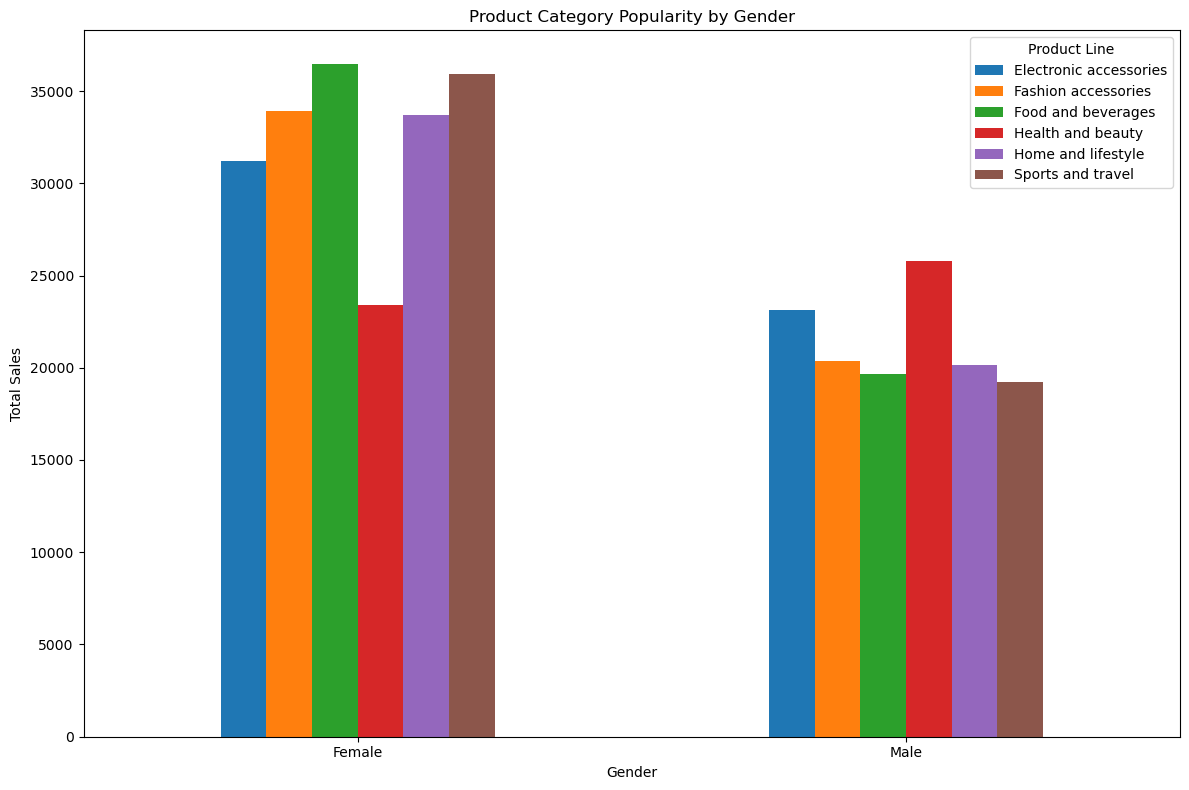

In [36]:
category_popularity_by_gender.plot(kind='bar', figsize=(12, 8))
plt.title('Product Category Popularity by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()

In [33]:
average_basket_value_by_gender = data.groupby('Gender')['Sales'].mean()
print(average_basket_value_by_gender)

Gender
Female    340.931414
Male      299.055738
Name: Sales, dtype: float64


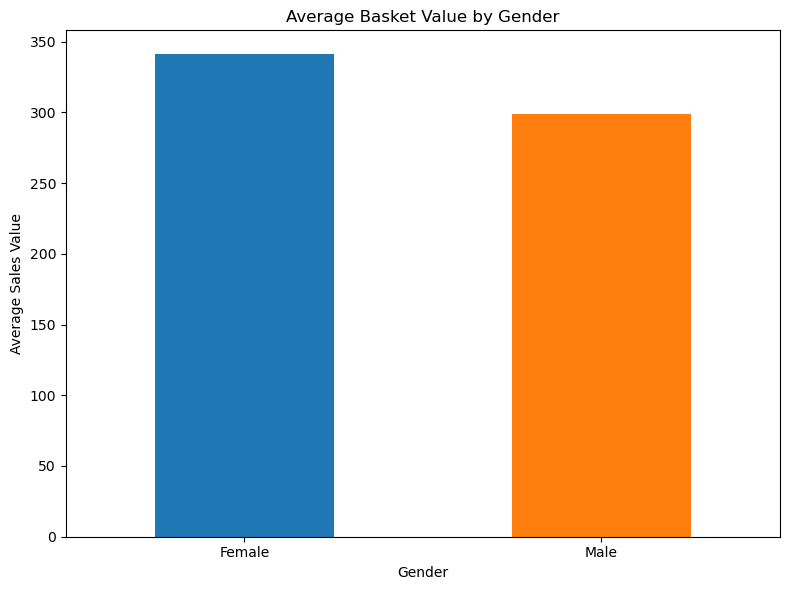

In [37]:
average_basket_value_by_gender.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))
plt.title('Average Basket Value by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sales Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()